In [1]:
import pandas as pd

In [2]:
originalFile = 'pornhub.com-db.csv'

Shrink large dataset

In [3]:
# originalDataset = pd.read_csv(originalFile, chunksize=100000, iterator=True, on_bad_lines='skip')
# for idx, chunk in enumerate(originalDataset):
    # chunk.to_csv(f'pornhub.com-db-shrinked{idx}-0.csv', mode='a', header=False, index=False) 

In [4]:
columns = ['embed','thumbnail','thumbnail2','title','tags','categories','pornstars','duration','views','likes','dislikes','thumbnail3','thumbnail4']

In [5]:
# dataset = pd.read_csv('pornhub.com-db-shrinked1-0.csv', delimiter='|', on_bad_lines='skip', columns=columns)
# dataset.to_csv('pornhub.com-db-shrinked1-0-fixed.csv', mode='a', header=False, index=False)

Data cleaning & processing

In [6]:
# from collections import Counter
# count = Counter()
# for i in range(len(dataset)):
#     count[len(dataset.iloc[i].embed.split('|'))] += 1
# count

In [7]:
# datasetValidation = [len(dataset.iloc[i].embed.split('|')) == 13 for i in range(len(dataset))]
# dataset = dataset[datasetValidation]

In [8]:
# datasetFixed = pd.DataFrame([dataset.iloc[i].embed.split('|') for i in range(1, len(dataset))], columns=dataset.iloc[0].embed.split('|'))

In [9]:
# datasetFixed.to_csv('pornhub.com-db-shrinked1-0-fixed.csv', index=False, header=True, sep='|')

Data quality check

In [11]:
dataset = pd.read_csv('pornhub.com-db.csv', delimiter='|', on_bad_lines='skip', header=None)
len(dataset)

3435419

In [12]:
dataset.columns = columns

In [13]:
import seaborn as sns
from collections import Counter
%matplotlib inline

In [14]:
dataset.columns, len(dataset.columns)

(Index(['embed', 'thumbnail', 'thumbnail2', 'title', 'tags', 'categories',
        'pornstars', 'duration', 'views', 'likes', 'dislikes', 'thumbnail3',
        'thumbnail4'],
       dtype='object'),
 13)

In [15]:
dataset.head()

,embed,thumbnail,thumbnail2,title,tags,categories,pornstars,duration,views,likes,dislikes,thumbnail3,thumbnail4
0,"<iframe src=""https://www.pornhub.com/embed/f4c...",https://di.phncdn.com/videos/200708/12/347/ori...,https://di.phncdn.com/videos/200708/12/347/ori...,Heather brooke swallo from condom,ideepthroat.com;pornstar;swallow;blowjob;fetis...,Blowjob;Pornstar;Verified Models,Heather Harmon,99,2639944,3130.0,478.0,https://di.phncdn.com/videos/200708/12/347/ori...,https://di.phncdn.com/videos/200708/12/347/ori...
1,"<iframe src=""https://www.pornhub.com/embed/3ee...",https://di.phncdn.com/videos/200705/06/417/ori...,https://di.phncdn.com/videos/200705/06/417/ori...,HEATHER IN CHRISTMAS,ideepthroat.com;fetish;blowjob;blonde;swallow;...,Blowjob;Fetish;Pornstar;Verified Models,Heather Harmon,126,992730,1782.0,276.0,https://di.phncdn.com/videos/200705/06/417/ori...,https://di.phncdn.com/videos/200705/06/417/ori...
2,"<iframe src=""https://www.pornhub.com/embed/e5e...",https://di.phncdn.com/videos/200704/18/518/ori...,https://di.phncdn.com/videos/200704/18/518/ori...,Blowjob Instruction,ideepthroat.com;blowjob;pornstar;blonde;big-di...,Orgy;Blonde;Blowjob;Pornstar;Threesome;Verifie...,Heather Harmon,86,837969,720.0,128.0,https://di.phncdn.com/videos/200704/18/518/ori...,https://di.phncdn.com/videos/200704/18/518/ori...
3,"<iframe src=""https://www.pornhub.com/embed/f8e...",https://di.phncdn.com/videos/200706/05/592/ori...,https://di.phncdn.com/videos/200706/05/592/ori...,heather brooke-talks dirty,ideepthroat.com;blowjob;blonde;big-dick;big-ti...,Blowjob;Pornstar;Verified Models,Heather Harmon,110,3422599,3512.0,457.0,https://di.phncdn.com/videos/200706/05/592/ori...,https://di.phncdn.com/videos/200706/05/592/ori...
4,"<iframe src=""https://www.pornhub.com/embed/493...",https://di.phncdn.com/videos/201010/27/6401/or...,https://di.phncdn.com/videos/201010/27/6401/or...,Hot blonde doing the Laundry,hot;blonde;laundry;anal;fuck;blowjob;cumshot;i...,Blonde;Pornstar;Anal;Verified Models,Heather Harmon,153,157006,145.0,33.0,https://di.phncdn.com/videos/201010/27/6401/or...,https://di.phncdn.com/videos/201010/27/6401/or...


In [16]:
dataset.describe()

,duration,views,likes,dislikes
count,3.435419e+06,3.435419e+06,3.089183e+06,3.089183e+06
mean,5.224059e+02,7.533594e+04,2.683648e+02,6.256540e+01
std,6.946790e+02,6.633161e+05,2.120420e+03,7.338234e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.020000e+02,3.410000e+02,5.000000e+00,0.000000e+00
50%,3.310000e+02,2.235000e+03,2.100000e+01,3.000000e+00
75%,6.730000e+02,1.924350e+04,9.400000e+01,1.500000e+01
max,1.033800e+05,2.218054e+08,6.558010e+05,2.721170e+05


In [17]:
tagsPopularity = Counter()
dataset['tags'].map(lambda x: tagsPopularity.update(x.split(";")) if pd.notnull(x) else None)
f"size of tags are {len(tagsPopularity)}"


'size of tags are 882110'

In [18]:
categoriesPopularity = Counter()
dataset['categories'].map(lambda x: categoriesPopularity.update(x.split(";")) if pd.notnull(x) else None)
f"size of categories are {len(categoriesPopularity)}"


'size of categories are 138'

Top 10 Popular Video Uploads by Tags

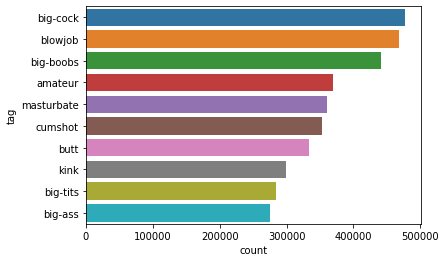

In [19]:
pd_tagsPopularity = pd.DataFrame(tagsPopularity.items(), columns=['tag', 'count'])
top10_tags = pd_tagsPopularity.sort_values(by='count', ascending=False).head(10)
sns.barplot(x=top10_tags['count'], y=top10_tags['tag']);

Least Popular Video Uploads by Tags

/home/bigmart0918/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21046 (\N{CJK UNIFIED IDEOGRAPH-5236}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/bigmart0918/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26381 (\N{CJK UNIFIED IDEOGRAPH-670D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


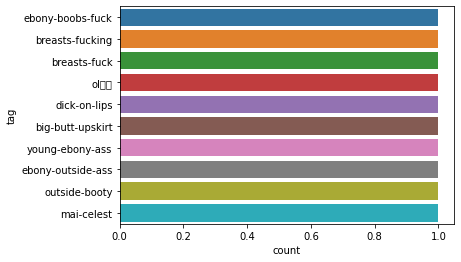

In [35]:
least10_tags = pd_tagsPopularity.sort_values(by='count', ascending=False).tail(10)
sns.barplot(x=least10_tags['count'], y=least10_tags['tag']);

Linear Relationship between each variable

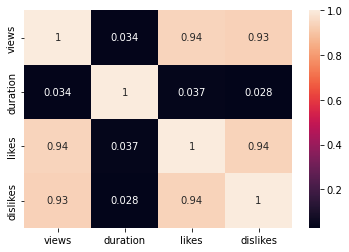

In [21]:
sns.heatmap(dataset[['views', 'duration', 'likes', 'dislikes']].corr(), annot=True);

Number of video taken by the pornstar

In [22]:
modelPopularity = Counter()
dataset['pornstars'].map(lambda x: modelPopularity.update(x.split(";")) if pd.notnull(x) else None)
f"number of pornstars are {len(modelPopularity)}"

'number of pornstars are 19534'

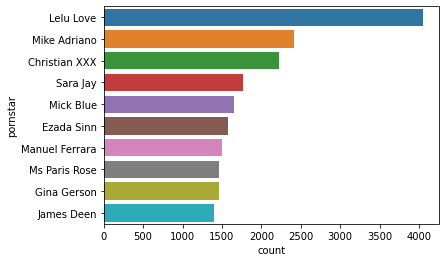

In [23]:
nVideoByPornstar = pd.DataFrame(modelPopularity.items(), columns=['pornstar', 'count']).sort_values(by='count', ascending=False).head(10)
sns.barplot(x=nVideoByPornstar['count'], y=nVideoByPornstar['pornstar']);

Top 10 Popular Video Views By Pornstar

In [24]:
c = Counter()
pornstarByVideoViews = dataset[dataset['pornstars'].notnull()]
pornstarByVideoViews = pornstarByVideoViews[['pornstars', 'views']]
for idx in range(len(pornstarByVideoViews)):
    info = pornstarByVideoViews.iloc[idx][['pornstars', 'views']]
    pornstars = info['pornstars'].split(';')
    for pornstar in pornstars:
        c[pornstar] += info['views']

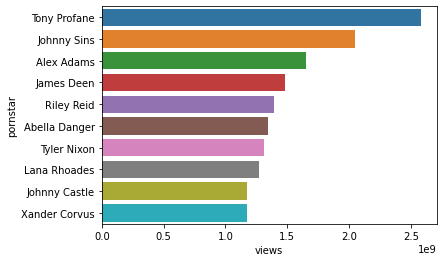

In [25]:
pornstarByVideoViews = pd.DataFrame(c.items(), columns=['pornstar', 'views'])
top10VideoViewsByPornstar = pornstarByVideoViews.sort_values(by='views', ascending=False).head(10)
sns.barplot(x=top10VideoViewsByPornstar['views'], y=top10VideoViewsByPornstar['pornstar']);

Store pornstar names in pornstars.txt

In [26]:
pornstars = list(c.keys())
pornstars.sort()
with open('pornstars.txt', 'w') as f:
    for pornstar in pornstars:
        f.write(f"{pornstar}\n")

Top 10 Popular Video Views By Tags

In [36]:
tagsCounter = Counter()
tagsByVideoViews = dataset[dataset['tags'].notnull()]
tagsByVideoViews = tagsByVideoViews[['tags', 'views']]
for idx in range(len(tagsByVideoViews)):
    info = tagsByVideoViews.iloc[idx][['tags', 'views']]
    tags = info['tags'].split(';')
    for tags in tags:
        tagsCounter[tags] += info['views']

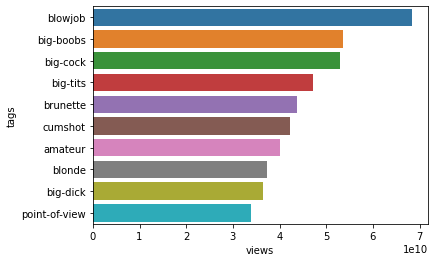

In [28]:
tagsByVideoViews = pd.DataFrame(c.items(), columns=['tags', 'views'])
top10VideoViewsByTags = tagsByVideoViews.sort_values(by='views', ascending=False).head(10)
sns.barplot(x=top10VideoViewsByTags['views'], y=top10VideoViewsByTags['tags']);

Least Popular Video Views By Tags

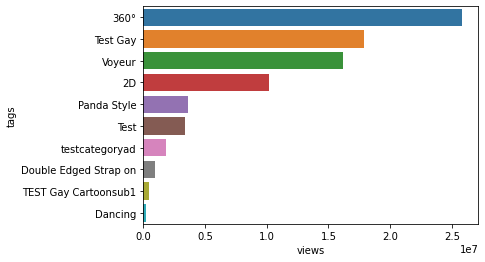

In [37]:
tagsByVideoViews = pd.DataFrame(tagsCounter.items(), columns=['tags', 'views'])
top10VideoViewsByTags = tagsByVideoViews.sort_values(by='views', ascending=False).tail(10)
sns.barplot(x=top10VideoViewsByTags['views'], y=top10VideoViewsByTags['tags']);

Store tags in pornTags.txt

In [30]:
pornTags = list(c.keys())
pornTags.sort()
with open('pornTags.txt', 'w', encoding="UTF-8") as f:
    for tag in pornTags:
        f.write(f"{tag}\n")

Top 10 Popular Video Views By Categories

In [31]:
c = Counter()
categoriesByVideoViews = dataset[dataset['categories'].notnull()]
categoriesByVideoViews = categoriesByVideoViews[['categories', 'views']]
for idx in range(len(categoriesByVideoViews)):
    info = categoriesByVideoViews.iloc[idx][['categories', 'views']]
    categories = info['categories'].split(';')
    for categories in categories:
        c[categories] += info['views']

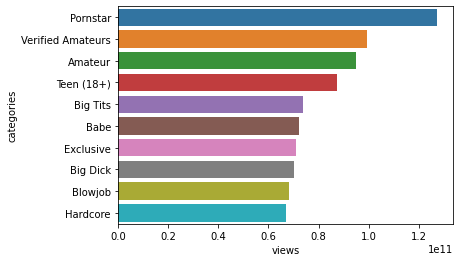

In [32]:
categoriesByVideoViews = pd.DataFrame(c.items(), columns=['categories', 'views'])
top10VideoViewsBycategories = categoriesByVideoViews.sort_values(by='views', ascending=False).head(10)
sns.barplot(x=top10VideoViewsBycategories['views'], y=top10VideoViewsBycategories['categories']);

Store categories in pornCategories.txt

In [33]:
pornCategories = list(c.keys())
pornCategories.sort()
with open('pornCategories.txt', 'w') as f:
    for category in pornCategories:
        f.write(f"{category}\n")